In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# GOAL: Create usable biomechanics data visualization for Teddy McGraw and the Wake Forest coaching staff
# GOAL: Create predictive models for fastball tilt based on biomechanical metrics

# Download excel and csv files and combine Data Frames

df1 = pd.read_excel(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\Baseball Analytics\wake_bullpens.xlsx')
df2 = pd.read_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\Baseball Analytics\wake_scrims.csv')
df3 = pd.read_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\Baseball Analytics\wakeData.csv')

dfs = [df1, df2, df3]

df = pd.concat(dfs, axis=0,ignore_index=True)
df = df.drop(columns=['Pitcher'])
df

c:\users\joeym\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (137) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PitchNo,Year,Date,Time,PitcherId,PitcherThrows,PitcherTeam,PitcherSet,TaggedPitchType,PitchSession,...,HotColdPoints,cluster,clusterSC,TrueSpin,szTop,szBot,isScrimmage,DateForBatters,DateForPitchers,Throws
0,1,Fall_2020,2020-08-27 00:00:00,14:17:42,1.000073e+09,Left,WAK_DEA,Stretch,Fastball,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,Fall_2020,2020-08-27 00:00:00,14:20:14,1.000073e+09,Left,WAK_DEA,Stretch,Fastball,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Fall_2020,2020-08-27 00:00:00,14:21:01,1.000073e+09,Left,WAK_DEA,Stretch,ChangeUp,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,Fall_2020,2020-08-27 00:00:00,14:21:26,1.000073e+09,Left,WAK_DEA,Stretch,ChangeUp,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,Fall_2020,2020-08-27 00:00:00,14:21:48,1.000073e+09,Left,WAK_DEA,Stretch,ChangeUp,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33826,172,Fall_2020,11/12/2020,4:52:12 PM,8.899270e+06,Right,WAK_DEA,Windup,Curveball,NaN,...,NaN,NaN,NaN,866.111759,NaN,NaN,NaN,NaN,NaN,NaN
33827,173,Fall_2020,11/12/2020,4:52:26 PM,8.899270e+06,Right,WAK_DEA,Windup,Fastball,NaN,...,NaN,NaN,NaN,2428.490418,NaN,NaN,NaN,NaN,NaN,NaN
33828,174,Fall_2020,11/12/2020,4:52:46 PM,8.899270e+06,Right,WAK_DEA,Windup,Curveball,NaN,...,NaN,NaN,NaN,1276.358339,NaN,NaN,NaN,NaN,NaN,NaN
33829,175,Fall_2020,11/12/2020,4:53:02 PM,8.899270e+06,Right,WAK_DEA,Windup,Fastball,NaN,...,NaN,NaN,NaN,2431.528521,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Filter out desired pitcher

options = [1000092978, 10018957]
playerdf = df[df['PitcherId'].isin(options)]

# Filter out just player's fastballs

playerfb = playerdf[playerdf['TaggedPitchType'].str.contains('Fastball|Sinker')]
playerfb

,PitchNo,Year,Date,Time,PitcherId,PitcherThrows,PitcherTeam,PitcherSet,TaggedPitchType,PitchSession,...,HotColdPoints,cluster,clusterSC,TrueSpin,szTop,szBot,isScrimmage,DateForBatters,DateForPitchers,Throws
79,1,Fall_2020,2020-08-28 00:00:00,17:07:37,1.001896e+07,Right,WAK_DEA,Windup,Fastball,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,2,Fall_2020,2020-08-28 00:00:00,17:08:19,1.001896e+07,Right,WAK_DEA,Windup,Fastball,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,4,Fall_2020,2020-08-28 00:00:00,17:10:09,1.001896e+07,Right,WAK_DEA,Windup,Fastball,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,5,Fall_2020,2020-08-28 00:00:00,17:10:53,1.001896e+07,Right,WAK_DEA,Windup,Sinker,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,6,Fall_2020,2020-08-28 00:00:00,17:11:24,1.001896e+07,Right,WAK_DEA,Windup,Sinker,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33162,275,Fall_2020,10/23/2020,6:22:44 PM,1.000093e+09,Right,WAK_DEA,Stretch,Sinker,NaN,...,NaN,NaN,NaN,1838.586882,NaN,NaN,NaN,NaN,NaN,NaN
33163,276,Fall_2020,10/23/2020,6:23:35 PM,1.000093e+09,Right,WAK_DEA,Stretch,Fastball,NaN,...,NaN,NaN,NaN,2217.636829,NaN,NaN,NaN,NaN,NaN,NaN
33164,277,Fall_2020,10/23/2020,6:24:12 PM,1.000093e+09,Right,WAK_DEA,Stretch,Fastball,NaN,...,NaN,NaN,NaN,2148.173452,NaN,NaN,NaN,NaN,NaN,NaN
33165,278,Fall_2020,10/23/2020,6:24:42 PM,1.000093e+09,Right,WAK_DEA,Stretch,Fastball,NaN,...,0.5,NaN,NaN,2049.617728,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='HorzBreak', ylabel='InducedVertBreak'>

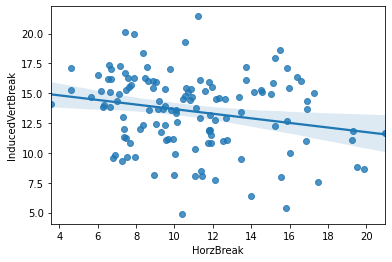

In [14]:
# Plot InducedVertBreak and HorzBreak

sns.regplot(x="HorzBreak", y="InducedVertBreak", data=teddyfb)

<AxesSubplot:xlabel='RelHeight', ylabel='InducedVertBreak'>

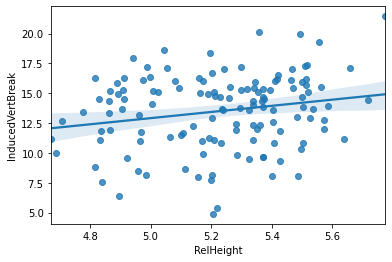

In [15]:
# Plot InducedVertBreak per Release Height

sns.regplot(x="RelHeight", y="InducedVertBreak", data=teddyfb)

<AxesSubplot:xlabel='RelHeight', ylabel='SpinAxis'>

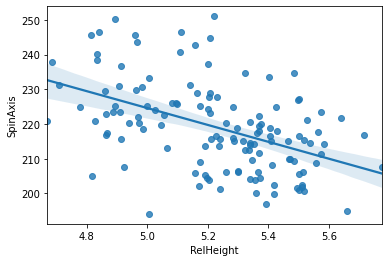

In [16]:
# Plot Spin Axis per Release Height

sns.regplot(x="RelHeight", y="SpinAxis", data=teddyfb)

In [17]:
# Plot InducedVertBreak per Tilt
# Plot HorzBreak per Tilt

# Scatterplot of all pitches at each tilt clock
# OR histogram of averages at each tilt clock

In [14]:
# Import biomech data and start doing Random Forest model

# Download excel files and combine Data Frames

biomechdf = pd.read_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\Baseball Analytics\Roosevelt Project\teddybiomechdata.csv')
biomechdf = biomechdf.drop(columns = ['Pitcher'])
biomechdf

,Drive,Users,User,Location,Project,Data,Session,PitchType,Item,Lead_Knee_Ang_Vel_Max,...,ReleaseTime_ms,STRIDE_LENGTH,Pelvis_Ang_Vel_max,Pitching_Hand_Ang_Vel_max,Pitching_Humerus_Ang_Vel_max,Thorax_Ang_Vel_max,BALL_RELEASE_SPEED,Pelvis_Ang_Vel@Footstrike,Pelvis_Ang_Vel@Max_Shoulder_Rot,Pelvis_Ang_Vel@Release
0,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Breaking Ball RH 1.c3d,1,498.706879,...,696.666748,1.460189,823.881958,2922.907471,5550.698242,1055.038208,36.523167,703.33057,389.53143,15.47536
1,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Breaking Ball RH 3.c3d,1,526.756958,...,716.666687,1.461492,778.864136,3067.819336,5717.079590,1109.804810,36.076126,625.09119,312.16071,2.21628
2,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Breaking Ball RH 4.c3d,1,498.706848,...,699.999817,1.460189,823.882202,2922.907471,5550.698242,1055.038208,36.523167,703.33057,389.53149,-3.66026
3,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 1.c3d,1,496.104614,...,683.333374,1.438083,864.825134,4120.759277,6050.747559,1133.019897,40.680641,710.31708,293.22281,-55.03012
4,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 2.c3d,1,499.300354,...,710.000061,1.453500,844.792603,4041.982666,6110.809570,1131.019531,40.948864,699.73462,380.65369,13.33078
5,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 3.c3d,1,521.821655,...,676.666748,1.446892,847.812134,4016.141113,6024.631348,1173.211670,40.993568,717.32056,296.79138,-37.82129
6,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 4.c3d,1,513.016418,...,706.666687,1.461673,861.550903,4038.362549,5859.315430,1119.224731,40.457119,733.16339,399.98898,-1.23986
7,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 5.c3d,1,526.332703,...,719.999817,1.485021,842.091064,4050.095459,6143.952637,1162.086060,41.619423,717.82068,351.66895,-14.31078
8,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 6.c3d,1,537.667725,...,669.999817,1.452333,850.319458,4083.783203,6181.902832,1173.505859,41.440609,692.33978,392.62067,-16.54639
9,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Off Speed RH 1.c3d,1,499.656860,...,713.333130,1.490067,831.639893,4094.127197,5725.454590,1112.084106,38.400738,695.47968,286.84027,-69.38612


In [15]:
# Filter biomech data for only fastballs

biomechfb = biomechdf[biomechdf['PitchType'].str.contains('Fastball')]
biomechfb

,Drive,Users,User,Location,Project,Data,Session,PitchType,Item,Lead_Knee_Ang_Vel_Max,...,ReleaseTime_ms,STRIDE_LENGTH,Pelvis_Ang_Vel_max,Pitching_Hand_Ang_Vel_max,Pitching_Humerus_Ang_Vel_max,Thorax_Ang_Vel_max,BALL_RELEASE_SPEED,Pelvis_Ang_Vel@Footstrike,Pelvis_Ang_Vel@Max_Shoulder_Rot,Pelvis_Ang_Vel@Release
3,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 1.c3d,1,496.104614,...,683.333374,1.438083,864.825134,4120.759277,6050.747559,1133.019897,40.680641,710.31708,293.22281,-55.03012
4,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 2.c3d,1,499.300354,...,710.000061,1.453500,844.792603,4041.982666,6110.809570,1131.019531,40.948864,699.73462,380.65369,13.33078
5,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 3.c3d,1,521.821655,...,676.666748,1.446892,847.812134,4016.141113,6024.631348,1173.211670,40.993568,717.32056,296.79138,-37.82129
6,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 4.c3d,1,513.016418,...,706.666687,1.461673,861.550903,4038.362549,5859.315430,1119.224731,40.457119,733.16339,399.98898,-1.23986
7,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 5.c3d,1,526.332703,...,719.999817,1.485021,842.091064,4050.095459,6143.952637,1162.086060,41.619423,717.82068,351.66895,-14.31078
8,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 6.c3d,1,537.667725,...,669.999817,1.452333,850.319458,4083.783203,6181.902832,1173.505859,41.440609,692.33978,392.62067,-16.54639
12,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_4,Fastball RH 1.c3d,1,439.699280,...,716.666687,1.447372,824.085022,4638.705566,5756.671387,1112.254028,40.591232,686.52472,267.03406,86.99506
13,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_4,Fastball RH 11.c3d,1,425.936615,...,763.333313,1.463048,802.445862,4541.577148,5842.132324,1153.317749,38.892479,661.59973,124.68141,-88.71880
14,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_4,Fastball RH 12.c3d,1,457.883392,...,699.999817,1.426435,807.443237,4615.117676,5733.791016,1137.947876,40.144192,592.07642,481.70370,15.79149
15,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_4,Fastball RH 13.c3d,1,472.394409,...,736.666687,1.477871,834.251282,4998.024902,6010.933594,1161.783447,40.099487,680.87726,155.19568,-51.08969


In [16]:
# FIGURE OUT IF X, Y, or Z ARE IMPORTANT FOR EACH METRIC

# Plot Spin Axis or Tilt vs Pelvic Tilt
# Plot Spin Axis or Tilt vs Trunk Lateral Tilt
# Hover over points for InducedVertBreak and HorzBreak
# OR threshold with colors - green = elite, yellow = playable, red = bad
# Set ranges for InducedVertBreak and HorzBreak values (see below)
# Set ranges for difference between InducedVertBreak and HorzBreak (see below)

# Predict which metrics are most relevant to fastball movement
# Goal: 4FB 12:30 with high InducedVertBreak (18-20+) and low HorzBreak (8-10)
# Goal: 2FB 2:00 with low InducedVertBreak (8-10) and high HorzBreak (16-20+)

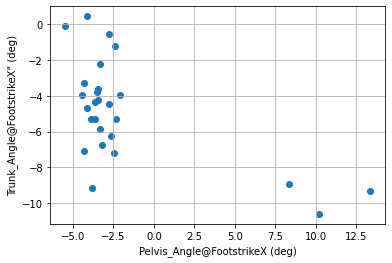

In [17]:
fig, ax = plt.subplots()
ax.scatter(biomechfb["Pelvis_Angle@FootstrikeX"], biomechfb["Trunk_Angle@FootstrikeX"])
ax.set(xlabel='Pelvis_Angle@FootstrikeX (deg)', ylabel='Trunk_Angle@FootstrikeX" (deg)')
ax.grid()

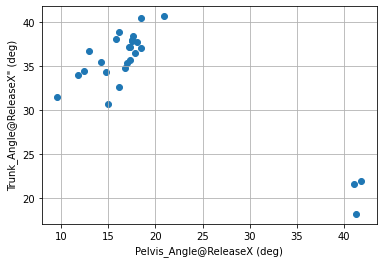

In [18]:
figure, bx = plt.subplots()
bx.scatter(biomechfb["Pelvis_Angle@ReleaseX"], biomechfb["Trunk_Angle@ReleaseX"])
bx.set(xlabel='Pelvis_Angle@ReleaseX (deg)', ylabel='Trunk_Angle@ReleaseX" (deg)')
bx.grid()

In [19]:
# Concatonate Biomechanical Metrics with TrackMan metrics
# FIX HOW THESE DF's MERGE
# Maybe add pitchUID to biomech df to merge based on that

finaldf = pd.concat([biomechfb, playerfb], axis=1)
finaldf

#finaldf.to_csv(r'C:\Users\joeym\Documents\Wake Forest\Baseball Analytics\finaldf.csv', index = False)

,Drive,Users,User,Location,Project,Data,Session,PitchType,Item,Lead_Knee_Ang_Vel_Max,...,HotColdPoints,cluster,clusterSC,TrueSpin,szTop,szBot,isScrimmage,DateForBatters,DateForPitchers,Throws
3,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 1.c3d,1.0,496.104614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 2.c3d,1.0,499.300354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 3.c3d,1.0,521.821655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 4.c3d,1.0,513.016418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,C:,Users,MAC_User2,Documents,BaseballQualisys,Data,Baseball Right-handed_3,Fastball RH 5.c3d,1.0,526.332703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1838.586882,NaN,NaN,NaN,NaN,NaN,NaN
33163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2217.636829,NaN,NaN,NaN,NaN,NaN,NaN
33164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2148.173452,NaN,NaN,NaN,NaN,NaN,NaN
33165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.5,NaN,NaN,2049.617728,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Encode 15 min intervals 12:00-3:00
# 1 = 12:00, 2 = 12:15, 3 = 12:30, ...
# One new column with coded Tilt numbers
# Convert Tilt to strings

playerfb['Tilt'] = playerfb['Tilt'].astype(str)

def Tilt_Code(playerfb):
    
    if playerfb['Tilt'] == "12:00":
        return 0
    if playerfb['Tilt'] == "12:15":
        return 0.25
    if playerfb['Tilt'] == "12:30":
        return 0.5
    if playerfb['Tilt'] == "12:45":
        return 0.75
    if playerfb['Tilt'] == "1:00":
        return 1
    if playerfb['Tilt'] == "1:15":
        return 1.25
    if playerfb['Tilt'] == "1:30":
        return 1.5
    if playerfb['Tilt'] == "1:45":
        return 1.75
    if playerfb['Tilt'] == "2:00":
        return 2
    if playerfb['Tilt'] == "2:15":
        return 2.25
    if playerfb['Tilt'] == "2:30":
        return 2.5
    if playerfb['Tilt'] == "2:45":
        return 2.75
    if playerfb['Tilt'] == "3:00":
        return 3
    
    # Is there a way to iterate this in a for loop easily???
    
playerfb['Tilt_Code'] = playerfb[['Tilt']].apply(Tilt_Code,axis=1)
playerfb

<ipython-input-21-0f714c97d9f0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerfb['Tilt'] = playerfb['Tilt'].astype(str)
<ipython-input-21-0f714c97d9f0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerfb['Tilt_Code'] = playerfb[['Tilt']].apply(Tilt_Code,axis=1)


,PitchNo,Year,Date,Time,PitcherId,PitcherThrows,PitcherTeam,PitcherSet,TaggedPitchType,PitchSession,...,cluster,clusterSC,TrueSpin,szTop,szBot,isScrimmage,DateForBatters,DateForPitchers,Throws,Tilt_Code
79,1,Fall_2020,2020-08-28 00:00:00,17:07:37,1.001896e+07,Right,WAK_DEA,Windup,Fastball,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,2,Fall_2020,2020-08-28 00:00:00,17:08:19,1.001896e+07,Right,WAK_DEA,Windup,Fastball,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,4,Fall_2020,2020-08-28 00:00:00,17:10:09,1.001896e+07,Right,WAK_DEA,Windup,Fastball,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,5,Fall_2020,2020-08-28 00:00:00,17:10:53,1.001896e+07,Right,WAK_DEA,Windup,Sinker,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,6,Fall_2020,2020-08-28 00:00:00,17:11:24,1.001896e+07,Right,WAK_DEA,Windup,Sinker,Live,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33162,275,Fall_2020,10/23/2020,6:22:44 PM,1.000093e+09,Right,WAK_DEA,Stretch,Sinker,NaN,...,NaN,NaN,1838.586882,NaN,NaN,NaN,NaN,NaN,NaN,1.75
33163,276,Fall_2020,10/23/2020,6:23:35 PM,1.000093e+09,Right,WAK_DEA,Stretch,Fastball,NaN,...,NaN,NaN,2217.636829,NaN,NaN,NaN,NaN,NaN,NaN,0.75
33164,277,Fall_2020,10/23/2020,6:24:12 PM,1.000093e+09,Right,WAK_DEA,Stretch,Fastball,NaN,...,NaN,NaN,2148.173452,NaN,NaN,NaN,NaN,NaN,NaN,1.00
33165,278,Fall_2020,10/23/2020,6:24:42 PM,1.000093e+09,Right,WAK_DEA,Stretch,Fastball,NaN,...,NaN,NaN,2049.617728,NaN,NaN,NaN,NaN,NaN,NaN,0.75


[(0.0, 3.0)]

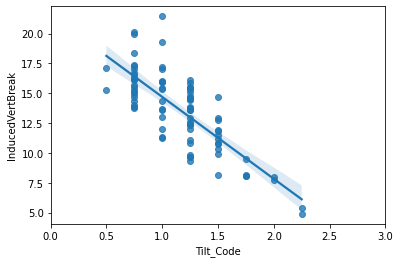

In [22]:
# Plot Tilt Code vs InducedVertBreak

tiltvert = sns.regplot(x="Tilt_Code", y="InducedVertBreak", data=playerfb)
tiltvert.set(xlim = (0, 3))

[(0.0, 3.0)]

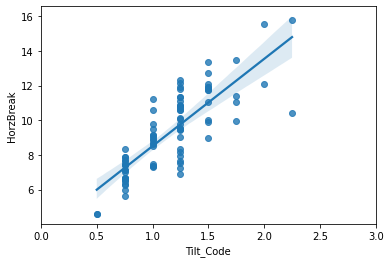

In [23]:
# Plot Tilt Code vs HorzBreak

tiltvert = sns.regplot(x="Tilt_Code", y="HorzBreak", data=playerfb)
tiltvert.set(xlim = (0, 3))

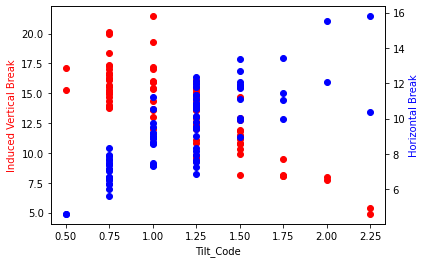

In [24]:
# Plot Tilt Clock vs InducedVertBreak and HorzBreak

fig,cx = plt.subplots()
cx.scatter(playerfb["Tilt_Code"], playerfb["InducedVertBreak"], color='red')
cx.set_xlabel("Tilt_Code")
cx.set_ylabel("Induced Vertical Break", color='red')
cx2=cx.twinx()
cx2.scatter(playerfb["Tilt_Code"], playerfb["HorzBreak"], color='blue')
cx2.set_ylabel("Horizontal Break", color='blue')
plt.show()

In [28]:
# Predicitive modeling